In [ ]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
#StatsModels is a powerful python library that is rich with statistical models.
#StatsModels library contains a number of models which can be used to forecast and predict data
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [ ]:
#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

In [ ]:
#Read Data
ActualData = pd.read_csv('C:/Users/Anis/Downloads/omc_4G.csv', sep=';', encoding = "ISO-8859-1")
                      #, parse_dates=[0], index_col=[0])
print(ActualData.columns)


Index(['Start_Time', 'Cell', '4G_SSR_%', '4G_ERAB_Drop_Rate_%',
       '4G_Cell_Availability_%', '4G_DL_Data_Volume_MB',
       '4G_DL_Packet_Loss_Rate_%'],
      dtype='object')


In [ ]:
ActualData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816 entries, 0 to 3815
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Start_Time                3816 non-null   object 
 1   Cell                      3816 non-null   object 
 2   4G_SSR_%                  3816 non-null   object 
 3   4G_ERAB_Drop_Rate_%       3816 non-null   object 
 4   4G_Cell_Availability_%    3816 non-null   float64
 5   4G_DL_Data_Volume_MB      3816 non-null   float64
 6   4G_DL_Packet_Loss_Rate_%  3816 non-null   object 
dtypes: float64(2), object(5)
memory usage: 208.8+ KB


In [ ]:
data = ActualData[["4G_ERAB_Drop_Rate_%" , "4G_DL_Packet_Loss_Rate_%","4G_SSR_%","4G_DL_Packet_Loss_Rate_%"]]

In [ ]:
ActualData.dtypes


Start_Time                   object
Cell                         object
4G_SSR_%                     object
4G_ERAB_Drop_Rate_%          object
4G_Cell_Availability_%      float64
4G_DL_Data_Volume_MB        float64
4G_DL_Packet_Loss_Rate_%     object
dtype: object

In [ ]:
ActualData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816 entries, 0 to 3815
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Start_Time                3816 non-null   object 
 1   Cell                      3816 non-null   object 
 2   4G_SSR_%                  3816 non-null   object 
 3   4G_ERAB_Drop_Rate_%       3816 non-null   object 
 4   4G_Cell_Availability_%    3816 non-null   float64
 5   4G_DL_Data_Volume_MB      3816 non-null   float64
 6   4G_DL_Packet_Loss_Rate_%  3816 non-null   object 
dtypes: float64(2), object(5)
memory usage: 208.8+ KB


In [ ]:
ActualData['Cell'].unique()

array(['Annobon-2', 'Pico_Basile-1', 'Nuevo_Estadio_DCS-3'], dtype=object)

In [ ]:
ActualData.isnull()

,Start_Time,Cell,4G_SSR_%,4G_ERAB_Drop_Rate_%,4G_Cell_Availability_%,4G_DL_Data_Volume_MB,4G_DL_Packet_Loss_Rate_%
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3811,False,False,False,False,False,False,False
3812,False,False,False,False,False,False,False
3813,False,False,False,False,False,False,False
3814,False,False,False,False,False,False,False


In [ ]:
#Delete null values
ActualData.dropna()

,Start_Time,Cell,4G_SSR_%,4G_ERAB_Drop_Rate_%,4G_Cell_Availability_%,4G_DL_Data_Volume_MB,4G_DL_Packet_Loss_Rate_%
0,11/09/2019 00:00,Annobon-2,100,0,0.01,9.174,0
1,11/09/2019 00:00,Pico_Basile-1,100,0,0.01,900.235,0
2,11/09/2019 00:00,Nuevo_Estadio_DCS-3,100,0,0.01,422.446,0
3,11/09/2019 01:00,Annobon-2,100,0,0.01,0.669,0
4,11/09/2019 01:00,Pico_Basile-1,100,0,0.01,361.508,0
...,...,...,...,...,...,...,...
3811,12/31/2019 22:00:00,Pico_Basile-1,100,0.763,0.01,1663.076,0
3812,12/31/2019 22:00:00,Nuevo_Estadio_DCS-3,100,0.37,0.01,3191.736,0
3813,12/31/2019 23:00:00,Annobon-2,98.701,0,0.01,240.504,0
3814,12/31/2019 23:00:00,Pico_Basile-1,100,0.247,0.01,1161.950,0


In [ ]:
ActualData.dtypes


Start_Time                   object
Cell                         object
4G_SSR_%                     object
4G_ERAB_Drop_Rate_%          object
4G_Cell_Availability_%      float64
4G_DL_Data_Volume_MB        float64
4G_DL_Packet_Loss_Rate_%     object
dtype: object

In [ ]:
#ActualData['Start_Time'] =  pd.to_datetime(ActualData['Start_Time'])

In [ ]:

ActualData.dtypes

Start_Time                   object
Cell                         object
4G_SSR_%                     object
4G_ERAB_Drop_Rate_%          object
4G_Cell_Availability_%      float64
4G_DL_Data_Volume_MB        float64
4G_DL_Packet_Loss_Rate_%     object
dtype: object

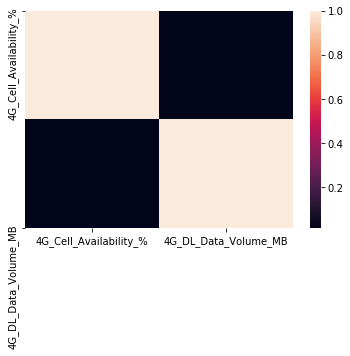

In [ ]:
sns.heatmap(ActualData.corr())

In [ ]:

# delete all rows for which column 'Age' has value greater than 30 and Country is India
indexNames = ActualData[(ActualData['4G_SSR_%'] == 'NIL')].index

ActualData.drop(indexNames , inplace=True)


In [ ]:
ActualData["4G_SSR_%"] = pd.to_numeric(ActualData["4G_SSR_%"], downcast="float")
ActualData["4G_ERAB_Drop_Rate_%"] = pd.to_numeric(ActualData["4G_ERAB_Drop_Rate_%"], downcast="float")





In [ ]:
ActualData.dtypes


Start_Time                   object
Cell                         object
4G_SSR_%                    float32
4G_ERAB_Drop_Rate_%         float32
4G_Cell_Availability_%      float64
4G_DL_Data_Volume_MB        float64
4G_DL_Packet_Loss_Rate_%     object
dtype: object

In [ ]:
ActualData.corr()



,4G_SSR_%,4G_ERAB_Drop_Rate_%,4G_Cell_Availability_%,4G_DL_Data_Volume_MB
4G_SSR_%,1.000000,-0.159392,-0.007215,-0.057322
4G_ERAB_Drop_Rate_%,-0.159392,1.000000,-0.017805,0.160472
4G_Cell_Availability_%,-0.007215,-0.017805,1.000000,0.015667
4G_DL_Data_Volume_MB,-0.057322,0.160472,0.015667,1.000000


In [ ]:
#voir la correlation entre les différentes variables
corr = ActualData.corr()
print(corr)

                        4G_SSR_%  4G_ERAB_Drop_Rate_%  4G_Cell_Availability_%  \
4G_SSR_%                1.000000            -0.159392               -0.007215   
4G_ERAB_Drop_Rate_%    -0.159392             1.000000               -0.017805   
4G_Cell_Availability_% -0.007215            -0.017805                1.000000   
4G_DL_Data_Volume_MB   -0.057322             0.160472                0.015667   

                        4G_DL_Data_Volume_MB  
4G_SSR_%                           -0.057322  
4G_ERAB_Drop_Rate_%                 0.160472  
4G_Cell_Availability_%              0.015667  
4G_DL_Data_Volume_MB                1.000000  


In [ ]:
Data_all=ActualData
Data_all

,Start_Time,Cell,4G_SSR_%,4G_ERAB_Drop_Rate_%,4G_Cell_Availability_%,4G_DL_Data_Volume_MB,4G_DL_Packet_Loss_Rate_%
0,11/09/2019 00:00,Annobon-2,100.000000,0.000,0.01,9.174,0
1,11/09/2019 00:00,Pico_Basile-1,100.000000,0.000,0.01,900.235,0
2,11/09/2019 00:00,Nuevo_Estadio_DCS-3,100.000000,0.000,0.01,422.446,0
3,11/09/2019 01:00,Annobon-2,100.000000,0.000,0.01,0.669,0
4,11/09/2019 01:00,Pico_Basile-1,100.000000,0.000,0.01,361.508,0
...,...,...,...,...,...,...,...
3811,12/31/2019 22:00:00,Pico_Basile-1,100.000000,0.763,0.01,1663.076,0
3812,12/31/2019 22:00:00,Nuevo_Estadio_DCS-3,100.000000,0.370,0.01,3191.736,0
3813,12/31/2019 23:00:00,Annobon-2,98.700996,0.000,0.01,240.504,0
3814,12/31/2019 23:00:00,Pico_Basile-1,100.000000,0.247,0.01,1161.950,0


In [ ]:
Data_all

,Start_Time,Cell,4G_SSR_%,4G_ERAB_Drop_Rate_%,4G_Cell_Availability_%,4G_DL_Data_Volume_MB,4G_DL_Packet_Loss_Rate_%
0,11/09/2019 00:00,Annobon-2,100.000000,0.000,0.01,9.174,0
1,11/09/2019 00:00,Pico_Basile-1,100.000000,0.000,0.01,900.235,0
2,11/09/2019 00:00,Nuevo_Estadio_DCS-3,100.000000,0.000,0.01,422.446,0
3,11/09/2019 01:00,Annobon-2,100.000000,0.000,0.01,0.669,0
4,11/09/2019 01:00,Pico_Basile-1,100.000000,0.000,0.01,361.508,0
...,...,...,...,...,...,...,...
3811,12/31/2019 22:00:00,Pico_Basile-1,100.000000,0.763,0.01,1663.076,0
3812,12/31/2019 22:00:00,Nuevo_Estadio_DCS-3,100.000000,0.370,0.01,3191.736,0
3813,12/31/2019 23:00:00,Annobon-2,98.700996,0.000,0.01,240.504,0
3814,12/31/2019 23:00:00,Pico_Basile-1,100.000000,0.247,0.01,1161.950,0


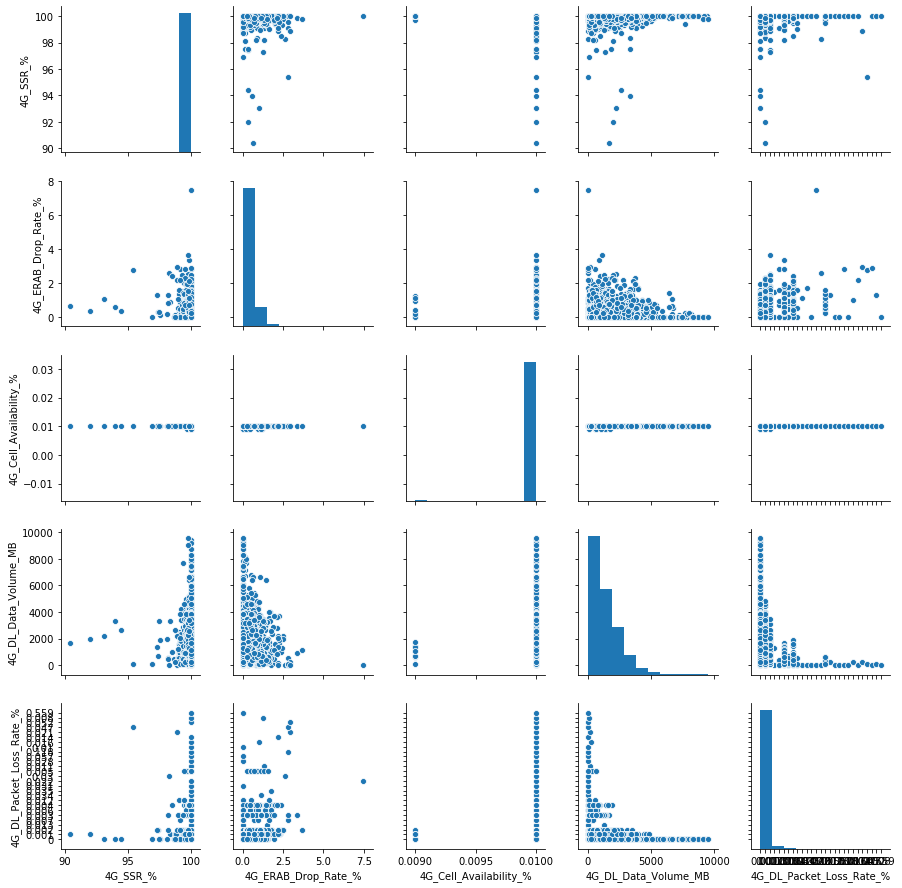

In [ ]:
sns.pairplot(ActualData)

# Prediction 4G_ERAB_Drop_Rate KPI for all type of cells

In [ ]:
ActualData=ActualData[["Start_Time","Cell","4G_ERAB_Drop_Rate_%"]]

In [ ]:
ActualData.head()

,Start_Time,Cell,4G_Cell_Availability_%
0,11/09/2019 00:00,Annobon-2,0.01
1,11/09/2019 00:00,Pico_Basile-1,0.01
2,11/09/2019 00:00,Nuevo_Estadio_DCS-3,0.01
3,11/09/2019 01:00,Annobon-2,0.01
4,11/09/2019 01:00,Pico_Basile-1,0.01


In [ ]:
ActualData.set_index("Start_Time", inplace=True)

In [ ]:
ActualData.head(10)

,Cell,4G_ERAB_Drop_Rate_%
Start_Time,,
11/09/2019 00:00,Annobon-2,0.0
11/09/2019 00:00,Pico_Basile-1,0.0
11/09/2019 00:00,Nuevo_Estadio_DCS-3,0.0
11/09/2019 01:00,Annobon-2,0.0
11/09/2019 01:00,Pico_Basile-1,0.0
11/09/2019 01:00,Nuevo_Estadio_DCS-3,0.0
11/09/2019 02:00,Annobon-2,0.0
11/09/2019 02:00,Pico_Basile-1,0.0
11/09/2019 02:00,Nuevo_Estadio_DCS-3,0.0


In [ ]:
ActualData.describe()

,4G_ERAB_Drop_Rate_%
count,3815.000000
mean,0.334963
std,0.428955
min,0.000000
25%,0.000000
50%,0.222000
75%,0.523000
max,7.477000


# Prediction 4g_Erab_Drop_Rate KPI for all type of cells

In [ ]:
 ActualData.sort_values(by='Cell')

,Cell,4G_ERAB_Drop_Rate_%
Start_Time,,
11/09/2019 00:00,Annobon-2,0.000
12/15/2019 23:00:00,Annobon-2,0.000
11/24/2019 23:00:00,Annobon-2,0.000
12/16/2019 00:00:00,Annobon-2,0.000
11/24/2019 22:00:00,Annobon-2,0.000
...,...,...
11/24/2019 23:00:00,Pico_Basile-1,0.000
12/15/2019 23:00:00,Pico_Basile-1,0.000
11/25/2019 00:00:00,Pico_Basile-1,0.000


In [ ]:
Data_Pico_Basile=ActualData[ActualData['Cell'] == 'Pico_Basile-1']

In [ ]:
Data_Pico_Basile.head()

,Cell,4G_ERAB_Drop_Rate_%
Start_Time,,
11/09/2019 00:00,Pico_Basile-1,0.0
11/09/2019 01:00,Pico_Basile-1,0.0
11/09/2019 02:00,Pico_Basile-1,0.0
11/09/2019 03:00,Pico_Basile-1,0.0
11/09/2019 04:00,Pico_Basile-1,0.0


In [ ]:
Data_Pico_Basile = Data_Pico_Basile['4G_ERAB_Drop_Rate_%']
Data_Pico_Basile.head()

Start_Time
11/09/2019 00:00    0.0
11/09/2019 01:00    0.0
11/09/2019 02:00    0.0
11/09/2019 03:00    0.0
11/09/2019 04:00    0.0
Name: 4G_ERAB_Drop_Rate_%, dtype: float32

In [ ]:
print(Data_Pico_Basile)

               Start_Time           Cell  4G_Cell_Availability_%
1        11/09/2019 00:00  Pico_Basile-1                    0.01
4        11/09/2019 01:00  Pico_Basile-1                    0.01
7        11/09/2019 02:00  Pico_Basile-1                    0.01
10       11/09/2019 03:00  Pico_Basile-1                    0.01
13       11/09/2019 04:00  Pico_Basile-1                    0.01
...                   ...            ...                     ...
3802  12/31/2019 19:00:00  Pico_Basile-1                    0.01
3805  12/31/2019 20:00:00  Pico_Basile-1                    0.01
3808  12/31/2019 21:00:00  Pico_Basile-1                    0.01
3811  12/31/2019 22:00:00  Pico_Basile-1                    0.01
3814  12/31/2019 23:00:00  Pico_Basile-1                    0.01

[1272 rows x 3 columns]


In [ ]:
Data_Pico_Basile=Data_Pico_Basile.astype('float64')

In [ ]:
Data_Pico_Basile

Start_Time
11/09/2019 00:00       0.000
11/09/2019 01:00       0.000
11/09/2019 02:00       0.000
11/09/2019 03:00       0.000
11/09/2019 04:00       0.000
                       ...  
12/31/2019 19:00:00    0.565
12/31/2019 20:00:00    0.404
12/31/2019 21:00:00    0.683
12/31/2019 22:00:00    0.763
12/31/2019 23:00:00    0.247
Name: 4G_ERAB_Drop_Rate_%, Length: 1272, dtype: float64

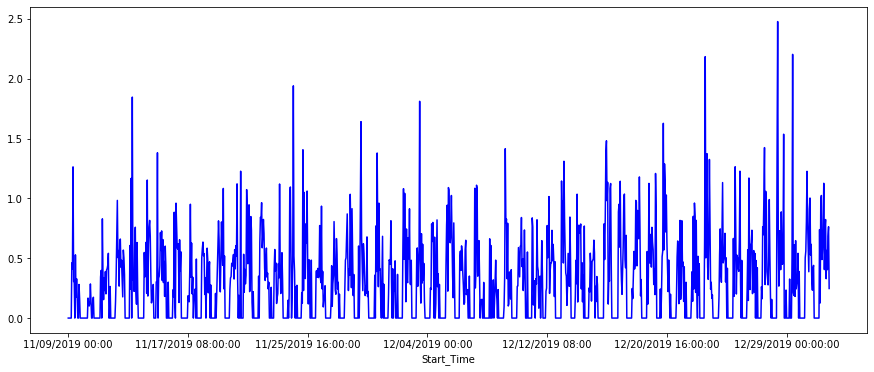

In [ ]:
Data_Pico_Basile.plot(figsize=(15,6), color='blue')

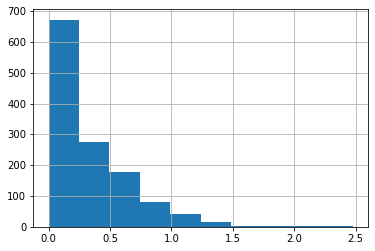

In [ ]:
#view data distrubution
Data_Pico_Basile.hist()

In [ ]:
#Size of data
NumberOfElements = len(Data_Pico_Basile)
print(NumberOfElements)


1272


In [ ]:
import pmdarima

In [ ]:
#Use 70% of data as training, rest 20% to Test model
TrainingSize = int(NumberOfElements * 0.8)
TrainingData = Data_Pico_Basile[0:TrainingSize]
TestData = Data_Pico_Basile[TrainingSize:NumberOfElements]

In [ ]:
TrainingData.count()

1017

In [ ]:
TestData.count()

255

In [ ]:
import pmdarima as pm

In [ ]:
model = pm.auto_arima(Data_Pico_Basile, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=1,
                           start_P=0,d=1, D=1, trace=True,)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=760.125, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1065.855, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=849.811, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=760.027, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1063.855, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=760.241, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.37 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=758.035, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=758.133, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=758.249, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=847.814, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.85 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 6.211 seconds


In [ ]:
print(model.aic())

758.0348020421993


In [ ]:
print(type(model))

<class 'pmdarima.arima.arima.ARIMA'>


In [ ]:
model

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
model.fit(TrainingData)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
future_forecast = model.predict(n_periods=255)

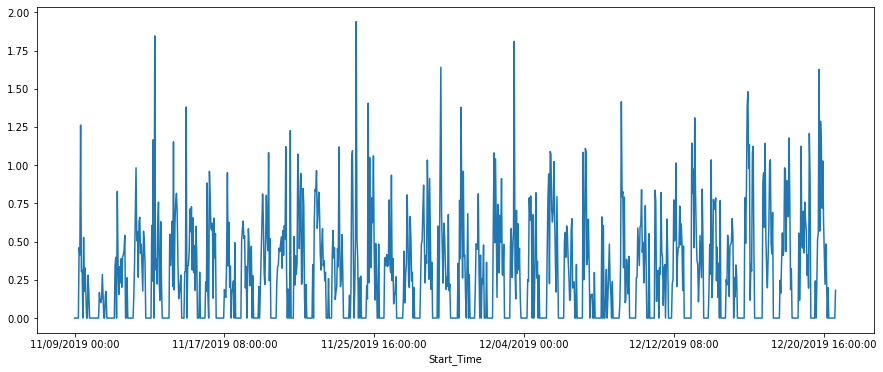

In [ ]:
TrainingData.plot(figsize=(15,6))


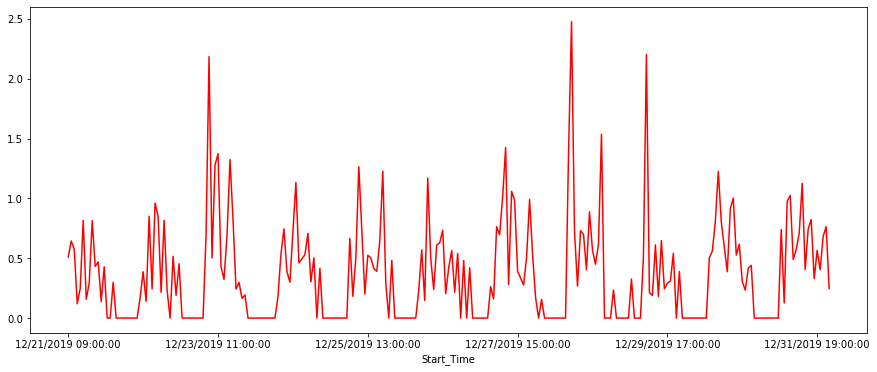

In [ ]:
TestData.plot(figsize=(15,6), color='red')

In [ ]:
TrainingData

Start_Time
11/09/2019 00:00       0.000
11/09/2019 01:00       0.000
11/09/2019 02:00       0.000
11/09/2019 03:00       0.000
11/09/2019 04:00       0.000
                       ...  
12/21/2019 04:00:00    0.000
12/21/2019 05:00:00    0.000
12/21/2019 06:00:00    0.000
12/21/2019 07:00:00    0.000
12/21/2019 08:00:00    0.182
Name: 4G_ERAB_Drop_Rate_%, Length: 1017, dtype: float64

In [ ]:
TestData

Start_Time
12/21/2019 09:00:00    0.510
12/21/2019 10:00:00    0.644
12/21/2019 11:00:00    0.576
12/21/2019 12:00:00    0.120
12/21/2019 13:00:00    0.248
                       ...  
12/31/2019 19:00:00    0.565
12/31/2019 20:00:00    0.404
12/31/2019 21:00:00    0.683
12/31/2019 22:00:00    0.763
12/31/2019 23:00:00    0.247
Name: 4G_ERAB_Drop_Rate_%, Length: 255, dtype: float64

In [ ]:
#new arrays to store actual and predictions
Actual = [x for x in TestData]
Predictions = list()
Actualist = list()

In [ ]:
print(len(Actual))

255


# Valeurs actuelles et predites avec arima

In [ ]:
#in a for loop, predict values using ARIMA model
for i in range(len(TestData)):
    ActualValue =  TestData[i]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 0,1,1)
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    Predictions.append(Prediction)
    Actualist.append(ActualValue)

Actual=0.510000, Predicted=0.483626
Actual=0.644000, Predicted=0.483626
Actual=0.576000, Predicted=0.483626
Actual=0.120000, Predicted=0.483626
Actual=0.248000, Predicted=0.483626
Actual=0.816000, Predicted=0.483626
Actual=0.157000, Predicted=0.483626
Actual=0.292000, Predicted=0.483626
Actual=0.813000, Predicted=0.483626
Actual=0.432000, Predicted=0.483626
Actual=0.468000, Predicted=0.483626
Actual=0.139000, Predicted=0.483626
Actual=0.428000, Predicted=0.483626
Actual=0.000000, Predicted=0.483626
Actual=0.000000, Predicted=0.483626
Actual=0.299000, Predicted=0.483626
Actual=0.000000, Predicted=0.483626
Actual=0.000000, Predicted=0.483626
Actual=0.000000, Predicted=0.483626
Actual=0.000000, Predicted=0.483626
Actual=0.000000, Predicted=0.483626
Actual=0.000000, Predicted=0.483626
Actual=0.000000, Predicted=0.483626
Actual=0.000000, Predicted=0.483626
Actual=0.172000, Predicted=0.483626
Actual=0.387000, Predicted=0.483626
Actual=0.140000, Predicted=0.483626
Actual=0.850000, Predicted=0

Actual=0.000000, Predicted=0.483626
Actual=0.000000, Predicted=0.483626
Actual=0.000000, Predicted=0.483626
Actual=0.000000, Predicted=0.483626
Actual=0.000000, Predicted=0.483626
Actual=0.000000, Predicted=0.483626
Actual=0.000000, Predicted=0.483626
Actual=0.000000, Predicted=0.483626
Actual=0.000000, Predicted=0.483626
Actual=0.739000, Predicted=0.483626
Actual=0.126000, Predicted=0.483626
Actual=0.976000, Predicted=0.483626
Actual=1.024000, Predicted=0.483626
Actual=0.489000, Predicted=0.483626
Actual=0.573000, Predicted=0.483626
Actual=0.707000, Predicted=0.483626
Actual=1.126000, Predicted=0.483626
Actual=0.405000, Predicted=0.483626
Actual=0.744000, Predicted=0.483626
Actual=0.823000, Predicted=0.483626
Actual=0.329000, Predicted=0.483626
Actual=0.565000, Predicted=0.483626
Actual=0.404000, Predicted=0.483626
Actual=0.683000, Predicted=0.483626
Actual=0.763000, Predicted=0.483626
Actual=0.247000, Predicted=0.483626


In [ ]:
print(len(Actual))

255


In [ ]:
future_forecast = pd.DataFrame(Predictions,index = TestData.index,columns=['Prediction'])


In [ ]:
future_forecast

,Prediction
Start_Time,
12/21/2019 09:00:00,0.483626
12/21/2019 10:00:00,0.483626
12/21/2019 11:00:00,0.483626
12/21/2019 12:00:00,0.483626
12/21/2019 13:00:00,0.483626
...,...
12/31/2019 19:00:00,0.483626
12/31/2019 20:00:00,0.483626
12/31/2019 21:00:00,0.483626


In [ ]:
actual= pd.DataFrame(Actual,index = TestData.index,columns=['Actual'])

ValueError: Shape of passed values is (510, 1), indices imply (255, 1)

In [ ]:
actual

,Actual
Start_Time,
12/21/2019 09:00:00,NaN
12/21/2019 10:00:00,NaN
12/21/2019 11:00:00,NaN
12/21/2019 12:00:00,NaN
12/21/2019 13:00:00,NaN
...,...
12/31/2019 19:00:00,NaN
12/31/2019 20:00:00,NaN
12/31/2019 21:00:00,NaN


In [ ]:
future_forecast

,Prediction
Start_Time,
12/21/2019 09:00:00,0.839550
12/21/2019 10:00:00,0.625724
12/21/2019 11:00:00,0.703419
12/21/2019 12:00:00,0.600647
12/21/2019 13:00:00,0.470884
...,...
12/31/2019 19:00:00,0.850854
12/31/2019 20:00:00,1.418637
12/31/2019 21:00:00,0.946151


In [ ]:
df = pd.concat([TrainingData,future_forecast],axis=1)

In [ ]:
df1 = pd.concat([TestData,future_forecast],axis=1)

In [ ]:
df

,4G_ERAB_Drop_Rate_%,Prediction
11/09/2019 00:00,0.0,NaN
11/09/2019 01:00,0.0,NaN
11/09/2019 02:00,0.0,NaN
11/09/2019 03:00,0.0,NaN
11/09/2019 04:00,0.0,NaN
...,...,...
12/31/2019 19:00:00,NaN,0.850854
12/31/2019 20:00:00,NaN,1.418637
12/31/2019 21:00:00,NaN,0.946151
12/31/2019 22:00:00,NaN,1.015658


In [ ]:
plt.show()

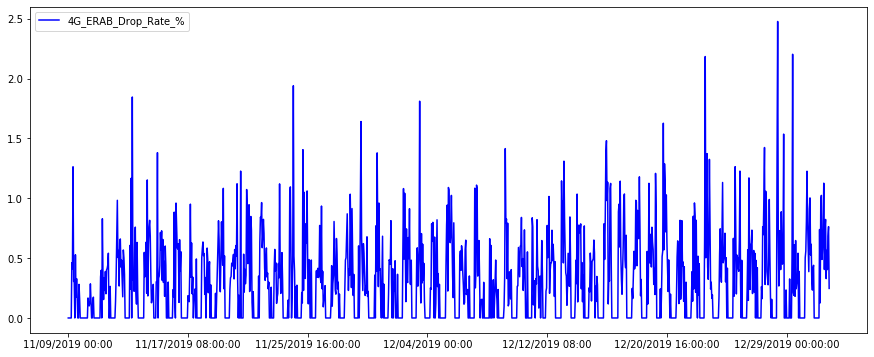

In [ ]:
#actual values
ax =df1.plot(figsize=(15,6), y=["4G_ERAB_Drop_Rate_%"] , color ='blue' )

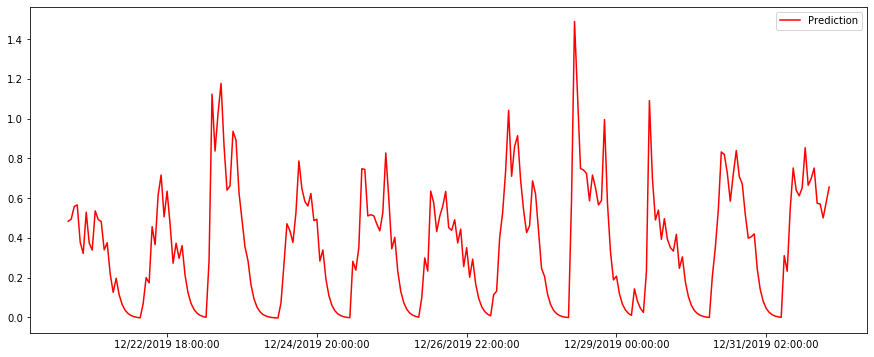

In [ ]:
#predicted values
df.plot(figsize=(15,6), y=["Prediction"] , color ='red' )

In [ ]:
dataPico = {'Actual':TestData, 'Predicted':Predictions}

Test Mean Squared Error (MSE): 0.189
Test Mean Absolute Error (MAE): 0.351


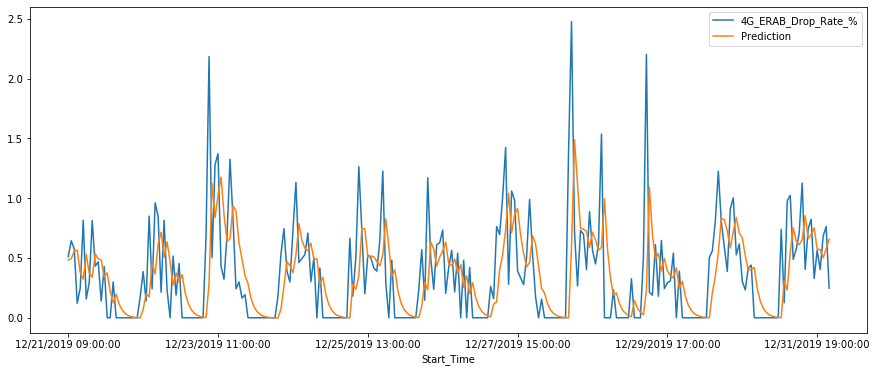

In [ ]:
#Print MSE to see how good the model is

Error = mean_squared_error(TestData, Predictions)
Error1 = mean_absolute_error(TestData, Predictions)

# plot

df1.plot(figsize=(15,6), y=["4G_ERAB_Drop_Rate_%", "Prediction"] )

print('Test Mean Squared Error (MSE): %.3f' % Error)
print('Test Mean Absolute Error (MAE): %.3f' % Error1)




In [ ]:
Data_Annobon=ActualData[ActualData['Cell'] == 'Annobon-2']
Data_Annobon.head()

,Cell,4G_ERAB_Drop_Rate_%
Start_Time,,
11/09/2019 00:00,Annobon-2,0.0
11/09/2019 01:00,Annobon-2,0.0
11/09/2019 02:00,Annobon-2,0.0
11/09/2019 03:00,Annobon-2,0.0
11/09/2019 04:00,Annobon-2,0.0


In [ ]:
Data_Annobon1 = Data_Annobon['4G_ERAB_Drop_Rate_%']
Data_Annobon.head()

,Cell,4G_ERAB_Drop_Rate_%
Start_Time,,
11/09/2019 00:00,Annobon-2,0.0
11/09/2019 01:00,Annobon-2,0.0
11/09/2019 02:00,Annobon-2,0.0
11/09/2019 03:00,Annobon-2,0.0
11/09/2019 04:00,Annobon-2,0.0


In [ ]:
print(Data_Annobon1)

Start_Time
11/09/2019 00:00       0.000
11/09/2019 01:00       0.000
11/09/2019 02:00       0.000
11/09/2019 03:00       0.000
11/09/2019 04:00       0.000
                       ...  
12/31/2019 19:00:00    0.932
12/31/2019 20:00:00    0.000
12/31/2019 21:00:00    0.000
12/31/2019 22:00:00    0.000
12/31/2019 23:00:00    0.000
Name: 4G_ERAB_Drop_Rate_%, Length: 1271, dtype: float32


In [ ]:
Data_Annobon=Data_Annobon1.astype('float64')
Data_Annobon

Start_Time
11/09/2019 00:00       0.000
11/09/2019 01:00       0.000
11/09/2019 02:00       0.000
11/09/2019 03:00       0.000
11/09/2019 04:00       0.000
                       ...  
12/31/2019 19:00:00    0.932
12/31/2019 20:00:00    0.000
12/31/2019 21:00:00    0.000
12/31/2019 22:00:00    0.000
12/31/2019 23:00:00    0.000
Name: 4G_ERAB_Drop_Rate_%, Length: 1271, dtype: float64

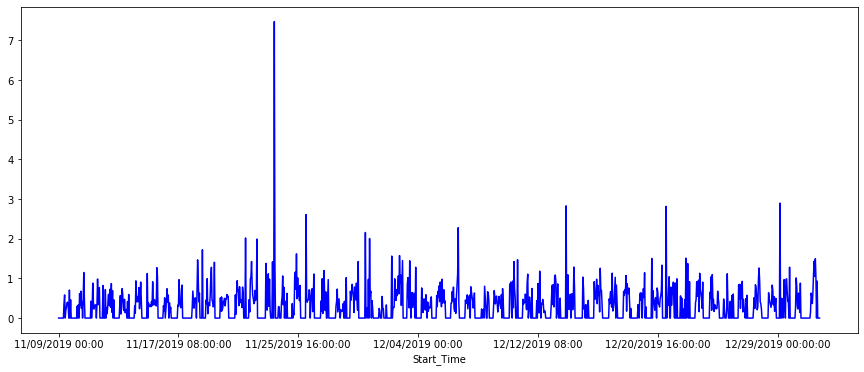

In [ ]:
Data_Annobon.plot(figsize=(15,6), color='blue')

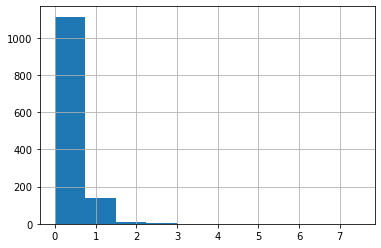

In [ ]:
Data_Annobon.hist()

In [ ]:
#Size of data
NumberOfElements = len(Data_Annobon)
print(NumberOfElements)

1271


In [ ]:
#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.8)
TrainingData = Data_Annobon[0:TrainingSize]
TestData = Data_Annobon[TrainingSize:NumberOfElements]

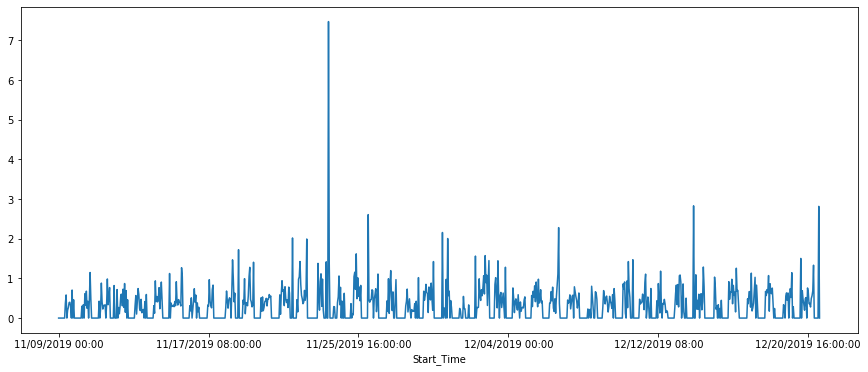

In [ ]:
TrainingData.plot(figsize=(15,6))

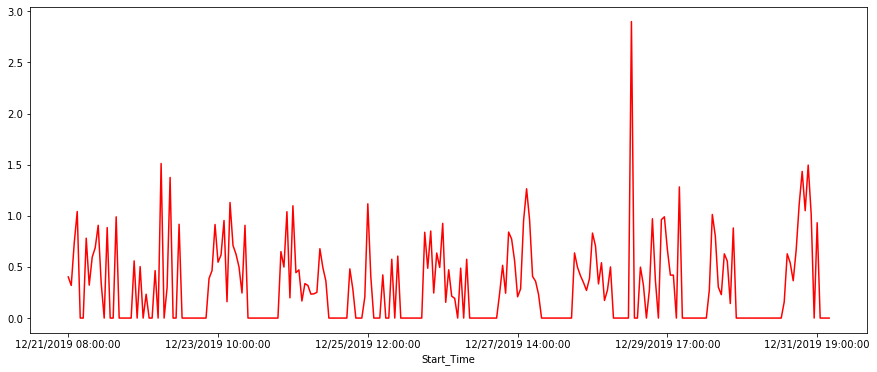

In [ ]:
TestData.plot(figsize=(15,6), color='red')

In [ ]:

#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()

In [ ]:

print(len(Actual))

1016


In [ ]:
#in a for loop, predict values using ARIMA model
for i in range(len(TestData)):
    ActualValue =  TestData[i]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 1,2,0)
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    Predictions.append(abs(Prediction))
    Actual.append(ActualValue)


Actual=0.402000, Predicted=0.823227
Actual=0.319000, Predicted=-1.269915
Actual=0.735000, Predicted=0.545896
Actual=1.042000, Predicted=0.832645
Actual=0.000000, Predicted=1.419170
Actual=0.000000, Predicted=-0.181581
Actual=0.781000, Predicted=-0.666164
Actual=0.322000, Predicted=1.065154
Actual=0.596000, Predicted=0.653833
Actual=0.687000, Predicted=0.402573
Actual=0.907000, Predicted=0.894914
Actual=0.342000, Predicted=1.045039
Actual=0.000000, Predicted=0.277062
Actual=0.885000, Predicted=-0.484808
Actual=0.000000, Predicted=0.989030
Actual=0.000000, Predicted=0.244385
Actual=0.990000, Predicted=-0.565010
Actual=0.000000, Predicted=1.350908
Actual=0.000000, Predicted=0.272426
Actual=0.000000, Predicted=-0.631462
Actual=0.000000, Predicted=0.000000
Actual=0.000000, Predicted=-0.000000
Actual=0.559000, Predicted=-0.000000
Actual=0.000000, Predicted=0.762682
Actual=0.503000, Predicted=0.152998
Actual=0.000000, Predicted=0.329204
Actual=0.233000, Predicted=0.138419
Actual=0.000000, Pre

Actual=0.000000, Predicted=0.000000
Actual=0.000000, Predicted=0.000000
Actual=0.000000, Predicted=0.000000
Actual=0.000000, Predicted=0.000000
Actual=0.000000, Predicted=0.000000
Actual=0.000000, Predicted=-0.000000
Actual=0.000000, Predicted=0.000000
Actual=0.000000, Predicted=-0.000000
Actual=0.000000, Predicted=-0.000000
Actual=0.000000, Predicted=0.000000
Actual=0.000000, Predicted=-0.000000
Actual=0.158000, Predicted=0.000000
Actual=0.628000, Predicted=0.214897
Actual=0.540000, Predicted=0.898577
Actual=0.365000, Predicted=0.809699
Actual=0.668000, Predicted=0.245541
Actual=1.113000, Predicted=0.664968
Actual=1.434000, Predicted=1.467576
Actual=1.050000, Predicted=1.834887
Actual=1.496000, Predicted=1.117260
Actual=1.018000, Predicted=1.410529
Actual=0.000000, Predicted=1.131946
Actual=0.932000, Predicted=-0.673504
Actual=0.000000, Predicted=0.614971
Actual=0.000000, Predicted=0.263812
Actual=0.000000, Predicted=-0.598118
Actual=0.000000, Predicted=-0.000000


In [ ]:
#Print MSE to see how good the model is

Error = mean_squared_error(TestData, Predictions)

print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)

Test Mean Squared Error (smaller the better fit): 0.343


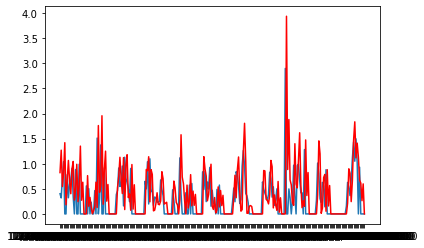

In [ ]:
# plot

pyplot.plot(TestData)
pyplot.plot(Predictions, color='red')

In [ ]:
Data_Nuevo_Estadio=ActualData[ActualData['Cell'] == 'Nuevo_Estadio_DCS-3']

In [ ]:
Data_Nuevo_Estadio1 = Data_Nuevo_Estadio['4G_ERAB_Drop_Rate_%']
Data_Nuevo_Estadio1.head()


Start_Time
11/09/2019 00:00    0.0
11/09/2019 01:00    0.0
11/09/2019 02:00    0.0
11/09/2019 03:00    0.0
11/09/2019 04:00    0.0
Name: 4G_ERAB_Drop_Rate_%, dtype: float32

In [ ]:
print(Data_Nuevo_Estadio1)

Start_Time
11/09/2019 00:00       0.000
11/09/2019 01:00       0.000
11/09/2019 02:00       0.000
11/09/2019 03:00       0.000
11/09/2019 04:00       0.000
                       ...  
12/31/2019 19:00:00    2.183
12/31/2019 20:00:00    0.300
12/31/2019 21:00:00    1.111
12/31/2019 22:00:00    0.370
12/31/2019 23:00:00    0.672
Name: 4G_ERAB_Drop_Rate_%, Length: 1272, dtype: float32


In [ ]:

Data_Nuevo_Estadio=Data_Nuevo_Estadio1.astype('float64')
Data_Nuevo_Estadio

Start_Time
11/09/2019 00:00       0.000
11/09/2019 01:00       0.000
11/09/2019 02:00       0.000
11/09/2019 03:00       0.000
11/09/2019 04:00       0.000
                       ...  
12/31/2019 19:00:00    2.183
12/31/2019 20:00:00    0.300
12/31/2019 21:00:00    1.111
12/31/2019 22:00:00    0.370
12/31/2019 23:00:00    0.672
Name: 4G_ERAB_Drop_Rate_%, Length: 1272, dtype: float64

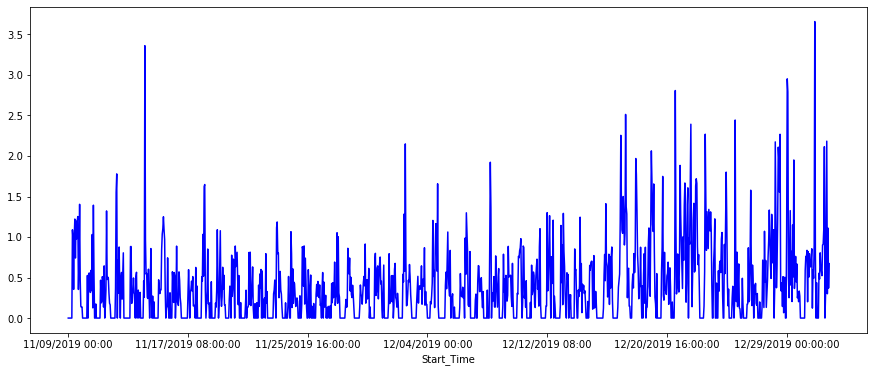

In [ ]:
Data_Nuevo_Estadio.plot(figsize=(15,6), color='blue')

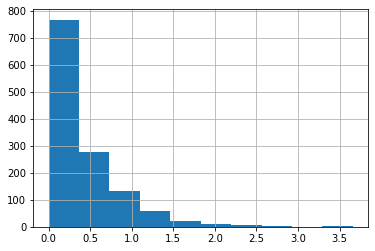

In [ ]:
Data_Nuevo_Estadio.hist()

In [ ]:
#Size of data
NumberOfElements = len(Data_Nuevo_Estadio)
print(NumberOfElements)

1272


In [ ]:
#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.8)
TrainingData = Data_Nuevo_Estadio[0:TrainingSize]
TestData = Data_Nuevo_Estadio[TrainingSize:NumberOfElements]

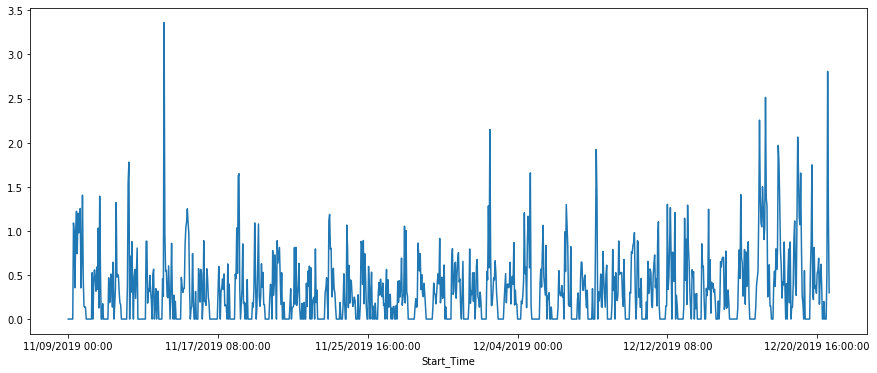

In [ ]:
TrainingData.plot(figsize=(15,6))

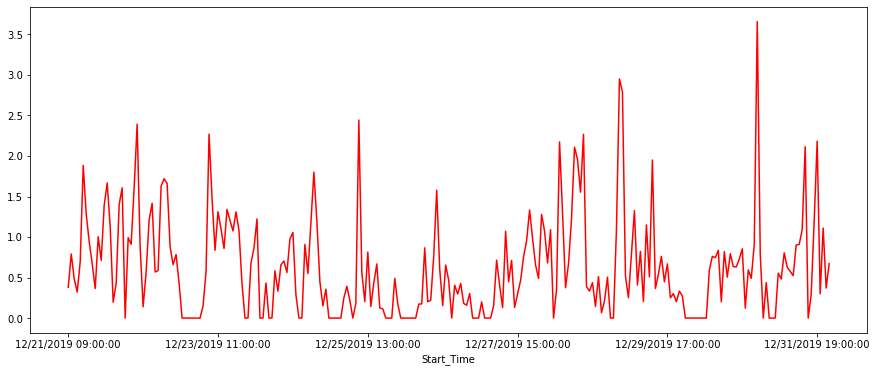

In [ ]:
TestData.plot(figsize=(15,6), color='red')

In [ ]:
#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()

print(len(Actual))

1017


In [ ]:
#in a for loop, predict values using ARIMA model
for i in range(len(TestData)):
    ActualValue =  TestData[i]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 1,2,0)
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    Predictions.append(Prediction)
    Actual.append(ActualValue)

Actual=0.379000, Predicted=-1.044916
Actual=0.791000, Predicted=-0.103295
Actual=0.481000, Predicted=1.004173
Actual=0.321000, Predicted=0.605906
Actual=0.698000, Predicted=0.070362
Actual=1.884000, Predicted=0.752124
Actual=1.282000, Predicted=2.585658
Actual=0.941000, Predicted=1.757855
Actual=0.671000, Predicted=0.442841
Actual=0.365000, Predicted=0.357981
Actual=1.003000, Predicted=0.080121
Actual=0.712000, Predicted=1.075563
Actual=1.390000, Predicted=0.978687
Actual=1.667000, Predicted=1.486062
Actual=1.131000, Predicted=2.185535
Actual=0.196000, Predicted=1.082225
Actual=0.429000, Predicted=-0.501561
Actual=1.402000, Predicted=-0.037901
Actual=1.607000, Predicted=1.935593
Actual=0.000000, Predicted=2.270321
Actual=0.992000, Predicted=-0.535843
Actual=0.911000, Predicted=0.429897
Actual=1.610000, Predicted=1.469232
Actual=2.392000, Predicted=1.845052
Actual=0.871000, Predicted=3.125794
Actual=0.140000, Predicted=0.719463
Actual=0.568000, Predicted=-1.060453
Actual=1.212000, Predi

Actual=0.123000, Predicted=0.964879
Actual=0.594000, Predicted=-0.128238
Actual=0.490000, Predicted=0.389049
Actual=0.906000, Predicted=0.709128
Actual=3.659000, Predicted=1.030091
Actual=0.794000, Predicted=5.106244
Actual=0.000000, Predicted=1.160863
Actual=0.437000, Predicted=-1.967615
Actual=0.000000, Predicted=0.186620
Actual=0.000000, Predicted=0.051173
Actual=0.000000, Predicted=-0.244330
Actual=0.554000, Predicted=-0.000000
Actual=0.482000, Predicted=0.799031
Actual=0.805000, Predicted=0.759975
Actual=0.627000, Predicted=0.907498
Actual=0.577000, Predicted=0.729045
Actual=0.523000, Predicted=0.455347
Actual=0.902000, Predicted=0.471170
Actual=0.908000, Predicted=1.039297
Actual=1.092000, Predicted=1.122654
Actual=2.115000, Predicted=1.176662
Actual=0.000000, Predicted=2.670170
Actual=0.289000, Predicted=-0.352831
Actual=1.194000, Predicted=-0.780639
Actual=2.183000, Predicted=1.756088
Actual=0.300000, Predicted=3.126336
Actual=1.111000, Predicted=0.018522
Actual=0.370000, Predi

In [ ]:
#Print MSE to see how good the model is

Error = mean_squared_error(TestData, Predictions)

print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)

Test Mean Squared Error (smaller the better fit): 0.824


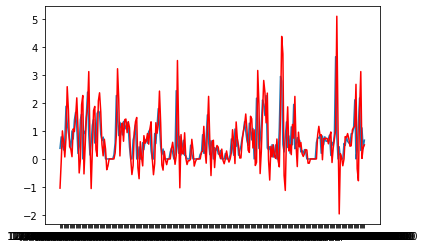

In [ ]:
# plot

pyplot.plot(TestData)
pyplot.plot(Predictions, color='red')